## K-means Clustering

The k-means algorithm is an algorithm to cluster n objects based on attributes into k partitions, where k < n.

An algorithm for partitioning (or clustering) N data points into K disjoint subsets Sj containing data points so as to minimize the sum-of-squares criterion:

$$\sum_{j=1}^{k} \sum_{i \in S_{j}}\left\|x_{i}-\mu_{j}\right\|^{2}$$

where xi is a vector representing the nth data point and µj is the geometric centroid of the data points in Sj.

- Simply speaking; k-means clustering is an algorithm to group the objects based on attributes/features into K number of group.
- K is positive integer number.
- The grouping is done by minimizing the sum of squares of distances between data and the corresponding cluster centroid.

In [21]:
import pandas as pd

# Read the data
data = pd.read_csv('data_reduced.csv')
data

,name,age,height,weight,genders,income
0,Ethan,87.00,316,26.0,F,H
1,Alexander,53.65,154,140.0,M,L
2,Henry,87.00,185,187.0,M,L
3,Xiao,29.94,216,129.0,M,L
4,Adam,29.94,213,90.0,M,L
5,Michael,53.65,189,132.0,M,L
6,Elizabeth,87.00,214,66.0,F,M
7,Abigail,53.65,185,3.0,F,M
8,Luke,29.94,152,133.0,M,M
9,Varun,87.00,199,134.0,M,H


In [22]:
k = 3
# clusturs[i]['color'] = clusturs[i]['nearest'].map(lambda x: 'red' if x == 1 else ('green' if x == 2 else 'blue'))

# add nearest column to data frame and set default value to 0 for first 7 rows and 1 for next 7 rows and 2 for last 7 rows
data['nearest'] = 0
data['color'] = 'red'
data.loc[7:13, 'nearest'] = 1
data.loc[7:13, 'color'] = 'green'
data.loc[14:20, 'nearest'] = 2
data.loc[14:20, 'color'] = 'blue'
data


,name,age,height,weight,genders,income,nearest,color
0,Ethan,87.00,316,26.0,F,H,0,red
1,Alexander,53.65,154,140.0,M,L,0,red
2,Henry,87.00,185,187.0,M,L,0,red
3,Xiao,29.94,216,129.0,M,L,0,red
4,Adam,29.94,213,90.0,M,L,0,red
5,Michael,53.65,189,132.0,M,L,0,red
6,Elizabeth,87.00,214,66.0,F,M,0,red
7,Abigail,53.65,185,3.0,F,M,1,green
8,Luke,29.94,152,133.0,M,M,1,green
9,Varun,87.00,199,134.0,M,H,1,green


In [23]:
import numpy as np

def calculate_centroid(clustur):
    dots = []
    for i in range(len(clustur)):
        age = clustur.iloc[i]['age']
        height = clustur.iloc[i]['height']
        weight = clustur.iloc[i]['weight']

        dots.append([age, height, weight])

    # calculate centroid of dots using minkowski distance
    dots = np.array(dots)
    centroid = np.mean(dots, axis=0)
    return centroid

In [24]:
# calculate centroid of each nearest

def update_centroids(data, centroids=[0 for i in range(k)]):
    for i in range(k):
        clustur = data[data['nearest'] == i]
        centroids[i] = calculate_centroid(clustur)
    return centroids

centroids = update_centroids(data)
centroids

[array([ 61.16857143, 212.42857143, 110.        ]),
 array([ 51.64      , 201.57142857,  85.28571429]),
 array([ 48.96, 161.5 , 108.5 ])]

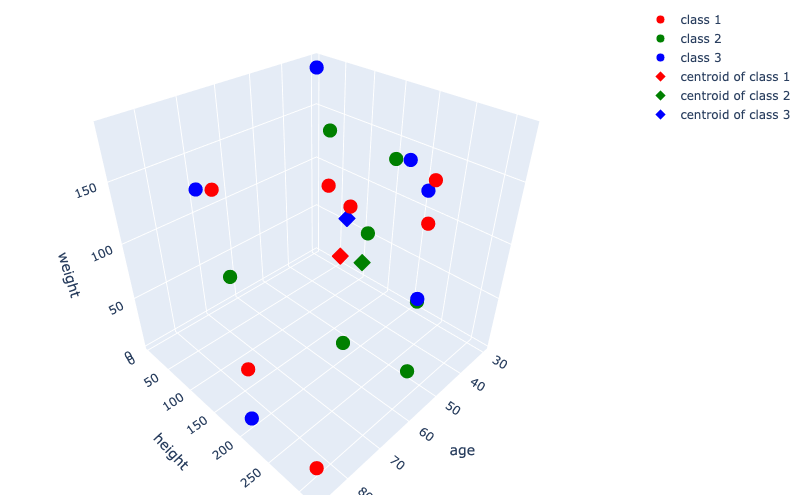

In [25]:
import plotly.graph_objects as go

def plot_clusturs(image_name='k_means.png'):
    fig = go.Figure(data=[])
    for i in range(k):
        datai = data[data['nearest'] == i]
        fig.add_trace(go.Scatter3d(x=datai['age'], y=datai['height'], z=datai['weight'], mode='markers', marker=dict(color=datai['color']), name = 'class ' + str(i+1)))

    fig.update_layout(scene=dict(
                        xaxis_title='age',
                        yaxis_title='height',
                        zaxis_title='weight'),
                        width=800,
                        margin=dict(r=10, b=5, l=5, t=5))

    fig.add_trace(go.Scatter3d(x=[centroids[0][0]], y=[centroids[0][1]], z=[centroids[0][2]], mode='markers', marker=dict(color='red', symbol='diamond'), name = 'centroid of class 1'))
    fig.add_trace(go.Scatter3d(x=[centroids[1][0]], y=[centroids[1][1]], z=[centroids[1][2]], mode='markers', marker=dict(color='green', symbol='diamond'), name = 'centroid of class 2'))
    fig.add_trace(go.Scatter3d(x=[centroids[2][0]], y=[centroids[2][1]], z=[centroids[2][2]], mode='markers', marker=dict(color='blue', symbol='diamond'), name = 'centroid of class 3'))

    fig.write_image(image_name)
    
    fig.show()

    return image_name

png = plot_clusturs('first_iteration.png')
from IPython.display import Image
Image(png)

### Minkowski Distance

The Minkowski distance is a metric in a normed vector space which can be considered as a generalization of both the Euclidean distance and the Manhattan distance.

$$\left(\sum_{i=1}^{n}\left|x_{i}-y_{i}\right|^{p}\right)^{1 / p}$$

- When p = 1, this is equivalent to the Manhattan distance.
- When p = 2, this is equivalent to the Euclidean distance.
- When p → ∞, this is equivalent to the Chebyshev distance.

The Minkowski Distance formula for vector X (29, 175, 137) and Y (87, 199, 134) is:

$$\left(\left|29-87\right|^{3}+\left|175-199\right|^{3}+\left|137-134\right|^{3}\right)^{1 / 3}$$



In [26]:
# calculate distance between each dot and each centroid and assign nearest centroid to each dot

def calculate_distance(dot, centroid):
    distance = round((abs(dot['age'] - centroid[0]) ** k + abs(dot['height'] - centroid[1]) ** k + abs(dot['weight'] - centroid[2]) ** k) ** (1/k), 2)
    return distance

def assign_nearest(data, centroids):
    for i in range(len(data)):
        dot = data.iloc[i]
        distances = []
        for j in range(k):
            distances.append(calculate_distance(dot, centroids[j]))
        nearest = distances.index(min(distances))
        data.loc[i, 'nearest'] = nearest
        data.loc[i, 'color'] = 'red' if nearest == 0 else ('green' if nearest == 1 else 'blue')
    return data

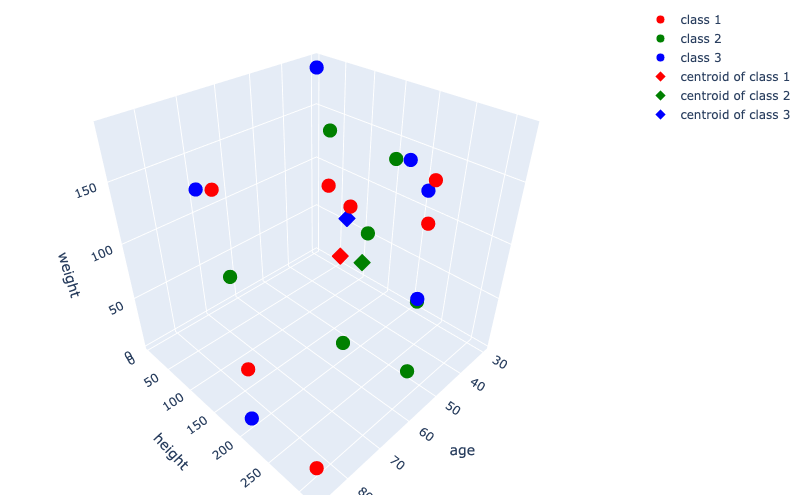

In [27]:
png = plot_clusturs('second_iteration.png')
Image(png)

In [28]:
centroids = update_centroids(data, centroids)
data = assign_nearest(data, centroids)
data

,name,age,height,weight,genders,income,nearest,color
0,Ethan,87.00,316,26.0,F,H,0,red
1,Alexander,53.65,154,140.0,M,L,2,blue
2,Henry,87.00,185,187.0,M,L,0,red
3,Xiao,29.94,216,129.0,M,L,0,red
4,Adam,29.94,213,90.0,M,L,1,green
5,Michael,53.65,189,132.0,M,L,0,red
6,Elizabeth,87.00,214,66.0,F,M,1,green
7,Abigail,53.65,185,3.0,F,M,1,green
8,Luke,29.94,152,133.0,M,M,2,blue
9,Varun,87.00,199,134.0,M,H,0,red


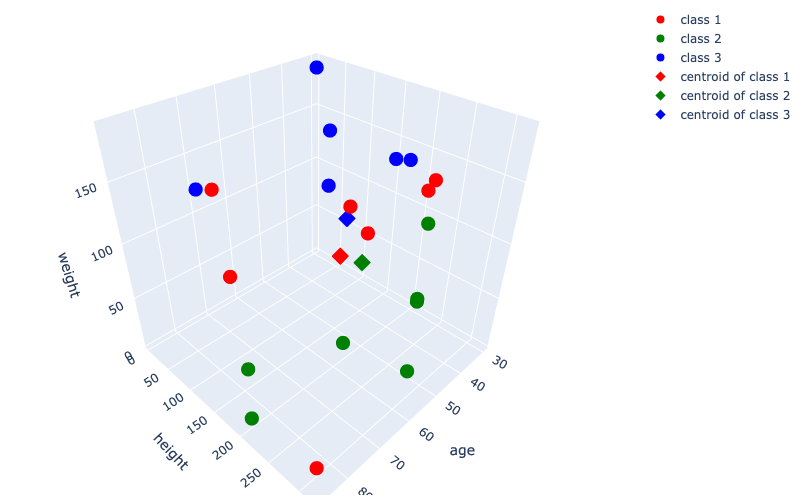

In [29]:
png = plot_clusturs('third_iteration.png')
Image(png)

In [30]:
centroids = update_centroids(data, centroids)
data = assign_nearest(data, centroids)
data

,name,age,height,weight,genders,income,nearest,color
0,Ethan,87.00,316,26.0,F,H,1,green
1,Alexander,53.65,154,140.0,M,L,2,blue
2,Henry,87.00,185,187.0,M,L,2,blue
3,Xiao,29.94,216,129.0,M,L,0,red
4,Adam,29.94,213,90.0,M,L,0,red
5,Michael,53.65,189,132.0,M,L,0,red
6,Elizabeth,87.00,214,66.0,F,M,1,green
7,Abigail,53.65,185,3.0,F,M,1,green
8,Luke,29.94,152,133.0,M,M,2,blue
9,Varun,87.00,199,134.0,M,H,0,red
